<a href="https://colab.research.google.com/github/Mathi-Alagan-T/Test-CV/blob/main/Data_analysis_using__pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=57ee90f3a8571e97d0cf7422f5093c713d1d7f32106d3bd018fa4d8d29811dae
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
!ls


sample_data  train.csv


In [5]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("NYC Taxi Trip Duration Analysis") \
    .getOrCreate()

# Load the dataset
file_path = "train.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df.show(5)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|id2875421|        2|2016-03-14 17:24:55|2016-03-14 17:32:30|              1| -73.9821548461914| 40.76793670654297|-73.96463012695312|40.765602111816406|                 N|          455|
|id2377394|        1|2016-06-12 00:43:35|2016-06-12 00:54:38|              1|-73.98041534423828|40.738563537597656|-73.99948120117188| 40.73115158081055|                 N|          663|
|id3858529|        2|2016-01-19 11:35:24|2016-01-19 12:10:48|    

In [6]:
df.describe().show()


+-------+---------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+
|summary|       id|          vendor_id|   passenger_count|   pickup_longitude|    pickup_latitude|  dropoff_longitude|   dropoff_latitude|store_and_fwd_flag|    trip_duration|
+-------+---------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+
|  count|  1458644|            1458644|           1458644|            1458644|            1458644|            1458644|            1458644|           1458644|          1458644|
|   mean|     NULL| 1.5349502688798637|1.6645295219395548| -73.97348630489282| 40.750920908391734|  -73.9734159469458|   40.7517995149002|              NULL|959.4922729603659|
| stddev|     NULL|0.49877715390740646|1.3142421678231109| 0.0709018584227027|0.03288118625763319| 0.0706432680971978|0.

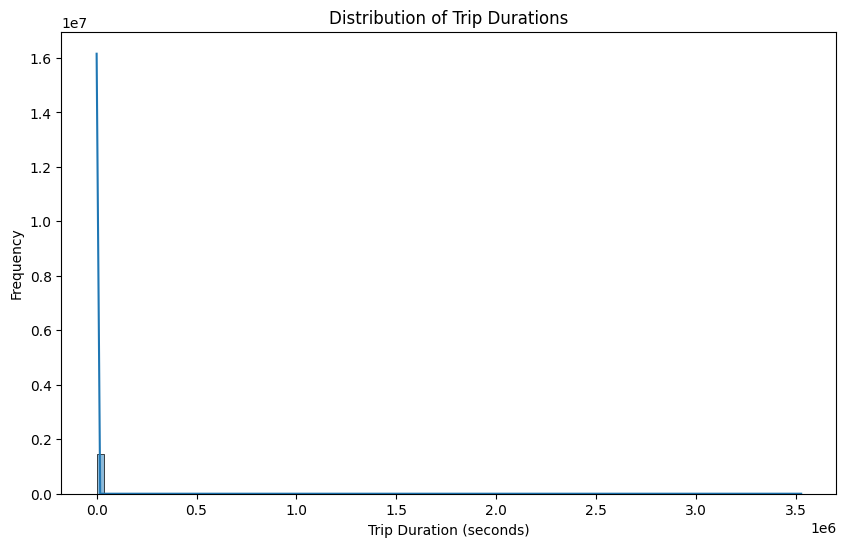

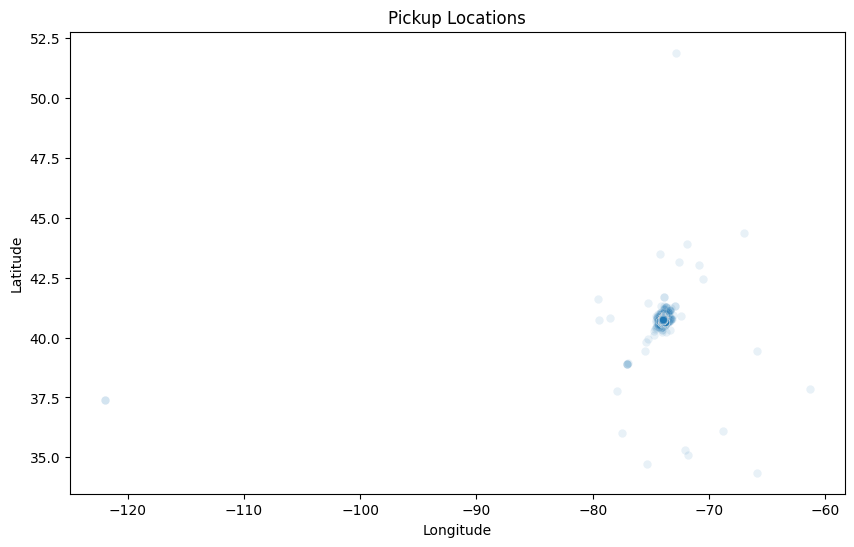

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for visualization
df_pd = df.toPandas()

# Visualize the distribution of trip durations
plt.figure(figsize=(10, 6))
sns.histplot(df_pd['trip_duration'], bins=100, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Analyze pickup and dropoff locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df_pd, alpha=0.1)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

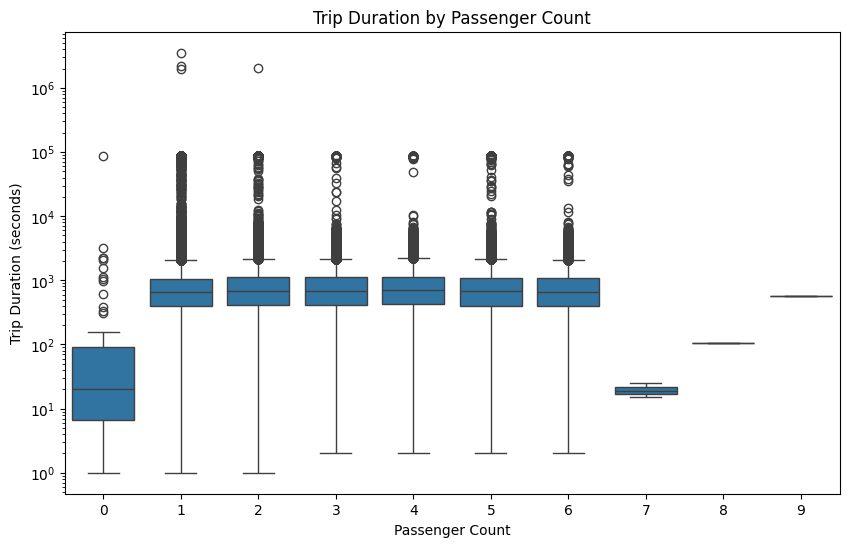

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='trip_duration', data=df_pd)
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (seconds)')
plt.yscale('log')  # Log scale for better visualization of skewed data
plt.show()